In [1]:
import os

# Change this to the folder where your project lives
os.chdir(r"C:\Users\PC\Desktop\DS projects\flu-shot-learning")

print("Current working directory:", os.getcwd())


Current working directory: C:\Users\PC\Desktop\DS projects\flu-shot-learning


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

# import sklearn libraries 
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler


In [3]:
# Load merged dataset
train_df = pd.read_csv("data/merged_train.csv")  

# Make a copy to preserve original data
df = train_df.copy(deep=True)

# Quick check
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [4]:
# Count missing values and percentages
missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df)) * 100

# Combine into a summary DataFrame
missing_summary = pd.DataFrame({
    "missing_count": missing_count,
    "missing_pct": missing_percent
}).sort_values("missing_pct", ascending=False)

missing_summary.head(20)  # show top 20 columns with missing values


,missing_count,missing_pct
employment_occupation,13470,50.436215
employment_industry,13330,49.912008
health_insurance,12274,45.957989
income_poverty,4423,16.561201
doctor_recc_h1n1,2160,8.087767
doctor_recc_seasonal,2160,8.087767
rent_or_own,2042,7.645936
employment_status,1463,5.477965
marital_status,1408,5.272026
education,1407,5.268282


In [5]:
# Step 1: Drop high-missing columns (>40%)
high_missing_cols = ["employment_occupation", "employment_industry", "health_insurance"]
df.drop(columns=high_missing_cols, inplace=True)

In [6]:
# Step 2: Handle moderate-missing values (5–30%)
moderate_missing_cols = ["income_poverty", "doctor_recc_h1n1", "doctor_recc_seasonal",
                         "rent_or_own", "employment_status", "marital_status", "education"]
# Separate numeric and categorical columns
num_cols = df.select_dtypes(include=["number"]).columns.tolist()
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
# Impute moderate-missing
for col in moderate_missing_cols:
    if col in num_cols:
        df[col].fillna(df[col].median(), inplace=True)
    elif col in cat_cols:
        df[col].fillna(df[col].mode()[0], inplace=True)


In [7]:
# Step 3: Handle remaining low-missing values (<5%)
low_missing_cols = [col for col in df.columns if df[col].isnull().sum() > 0]

for col in low_missing_cols:
    if df[col].dtype in ["float64", "int64"]:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

In [8]:
# Step 4: Verify no missing values remain
missing_check = df.isnull().sum().sum()
print(f"Total missing values remaining: {missing_check}")

Total missing values remaining: 0


In [9]:
# Check for duplicates
duplicate_count = df.duplicated().sum()
print(f"Total duplicate rows: {duplicate_count}")


Total duplicate rows: 0


In [10]:
# Check for duplicate respondent IDs
id_duplicates = df.duplicated(subset=["respondent_id"]).sum()
print(f"Total duplicate respondent_ids: {id_duplicates}")

Total duplicate respondent_ids: 0


In [11]:
# Check data types of all columns
print(df.dtypes)

# Optional: get a concise summary with counts of each type
print("\nData types summary:")
print(df.dtypes.value_counts())


respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty           

In [12]:
# Convert object columns to 'category'
cat_cols = df.select_dtypes(include="object").columns
for col in cat_cols:
    df[col] = df[col].astype("category")

# Verify
print(df.dtypes.value_counts())


float64     22
int64        3
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
Name: count, dtype: int64


In [13]:
for col in cat_cols:
    print(f"Column: {col}")
    print("Counts:")
    print(df[col].value_counts(dropna=False))
    print("-" * 50)


Column: age_group
Counts:
age_group
65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: count, dtype: int64
--------------------------------------------------
Column: education
Counts:
education
College Graduate    11504
Some College         7043
12 Years             5797
< 12 Years           2363
Name: count, dtype: int64
--------------------------------------------------
Column: race
Counts:
race
White                21222
Black                 2118
Hispanic              1755
Other or Multiple     1612
Name: count, dtype: int64
--------------------------------------------------
Column: sex
Counts:
sex
Female    15858
Male      10849
Name: count, dtype: int64
--------------------------------------------------
Column: income_poverty
Counts:
income_poverty
<= $75,000, Above Poverty    17200
> $75,000                     6810
Below Poverty                 2697
Name: count, dtype: int64
---------------------------------------

## Observation
Age group: Largest group is 65+ Years (6843), smallest is 35 - 44 Years (3848).

Education: Most respondents are College Graduate (11504), least are < 12 Years (2363).

Race: Majority are White (21222), minority groups are Black, Hispanic, and Other or Multiple.

Sex: More Female (15858) than Male (10849).

Income/Poverty: Majority earn <= $75,000, Above Poverty (17200).

Marital Status: Married respondents (14963) slightly outnumber Not Married (11744).

Rent or Own: Most own their residence (20778).

Employment Status: Employed (15023) is the largest group.

HHS Geo Region: Responses are spread across 10 regions, largest lzgpxyit (4297).

Census MSA: Most live in MSA, Not Principle City (11645).

In [14]:

# 2. Identify Categorical & Numerical Columns
num_cols = df.select_dtypes(include=["float64", "int64"]).columns.tolist()
cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

print("Numerical Columns:", num_cols)
print("Categorical Columns:", cat_cols)


Numerical Columns: ['respondent_id', 'h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults', 'household_children', 'h1n1_vaccine', 'seasonal_vaccine']
Categorical Columns: ['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa']


In [15]:
#  Encode Ordinal Features (with correct order)

# Manual mapping for proper order
age_order = {
    "18 - 34 Years": 0,
    "35 - 44 Years": 1,
    "45 - 54 Years": 2,
    "55 - 64 Years": 3,
    "65+ Years": 4
}
edu_order = {
    "< 12 Years": 0,
    "12 Years": 1,
    "Some College": 2,
    "College Graduate": 3
}
income_order = {
    "Below Poverty": 0,
    "<= $75,000, Above Poverty": 1,
    "> $75,000": 2
}

df["age_group"] = df["age_group"].map(age_order)
df["education"] = df["education"].map(edu_order)
df["income_poverty"] = df["income_poverty"].map(income_order)

print("Ordinal features encoded ")
df[["age_group", "education", "income_poverty"]].head()


Ordinal features encoded 


,age_group,education,income_poverty
0,3,0,0
1,1,1,0
2,0,3,1
3,4,1,0
4,2,2,1


In [16]:
# Explicitly convert mapped features to int
df["age_group"] = df["age_group"].astype("Int64")   # Int64 keeps NaN safe
df["education"] = df["education"].astype("Int64")
df["income_poverty"] = df["income_poverty"].astype("Int64")

# Verify
df[["age_group", "education", "income_poverty"]].head()


,age_group,education,income_poverty
0,3,0,0
1,1,1,0
2,0,3,1
3,4,1,0
4,2,2,1


In [17]:
# One-Hot Encode Nominal Features

nominal_features = ["race", "sex", "marital_status", "rent_or_own", 
                    "employment_status", "hhs_geo_region", "census_msa"]

df = pd.get_dummies(df, columns=nominal_features, drop_first=True, dtype=int)


df.head()


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Principle City",census_msa_Non-MSA
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,0,0,0,1,0,0,1
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,1,0,0


In [18]:
# Scaling Numerical Features

# Identify numeric columns (excluding ID and target variables)
num_features = [
    col for col in df.select_dtypes(include=["int64", "float64"]).columns
    if col not in ["respondent_id", "h1n1_vaccine", "seasonal_vaccine"]
]

scaler = StandardScaler()
df[num_features] = scaler.fit_transform(df[num_features])

df.head(10)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Principle City",census_msa_Non-MSA
0,0,-0.681849,-2.044279,-0.226293,-1.634957,-0.272097,-2.177944,-0.74589,1.404892,0.687870,...,0,0,0,0,0,0,1,0,0,1
1,1,1.518373,1.197027,-0.226293,0.611637,-0.272097,0.459149,-0.74589,1.404892,0.687870,...,0,0,0,0,0,0,0,0,0,0
2,2,-0.681849,-0.423626,-0.226293,0.611637,-0.272097,-2.177944,-0.74589,-0.711798,-1.453764,...,0,0,0,0,0,0,0,1,0,0
3,3,-0.681849,-0.423626,-0.226293,0.611637,-0.272097,0.459149,1.34068,-0.711798,-1.453764,...,0,0,0,1,0,0,0,0,1,0
4,4,0.418262,-0.423626,-0.226293,0.611637,-0.272097,0.459149,1.34068,-0.711798,0.687870,...,0,0,0,0,0,0,0,1,0,0
5,5,1.518373,-0.423626,-0.226293,0.611637,-0.272097,0.459149,-0.74589,-0.711798,0.687870,...,0,0,0,0,0,0,0,0,1,0
6,6,-1.781960,-2.044279,-0.226293,-1.634957,-0.272097,-2.177944,-0.74589,-0.711798,-1.453764,...,0,0,0,0,0,0,0,1,0,0
7,7,-0.681849,-2.044279,-0.226293,0.611637,-0.272097,0.459149,-0.74589,-0.711798,0.687870,...,0,0,0,0,0,0,0,0,0,1
8,8,-1.781960,1.197027,-0.226293,0.611637,-0.272097,0.459149,1.34068,1.404892,0.687870,...,0,0,0,0,0,0,0,0,0,0
9,9,0.418262,-0.423626,-0.226293,0.611637,-0.272097,-2.177944,1.34068,-0.711798,0.687870,...,0,0,0,0,0,0,0,1,0,0


In [19]:
# Count how many 1s appear in each encoded region column
region_cols = [col for col in df.columns if "hhs_geo_region" in col]
df[region_cols].sum()


hhs_geo_region_bhuqouqj    2846
hhs_geo_region_dqpwygqj    1126
hhs_geo_region_fpwskwrf    3265
hhs_geo_region_kbazzjca    2858
hhs_geo_region_lrircsnp    2078
hhs_geo_region_lzgpxyit    4297
hhs_geo_region_mlyzmhmf    2243
hhs_geo_region_oxchjgsf    2859
hhs_geo_region_qufhixun    3102
dtype: int64

In [20]:
# Keep a copy of respondent_id for reference
ids = df["respondent_id"].copy()

# Drop it from the main dataframe used for analysis and modeling
df = df.drop("respondent_id", axis=1)

print("respondent_id removed from modeling dataset but kept in 'ids' variable.")


respondent_id removed from modeling dataset but kept in 'ids' variable.


In [21]:

#  Create Behavioral Score

# Idea: People who follow many protective behaviors (masking, hand washing, avoiding crowds, etc.)
# are probably more cautious and might be more likely to vaccinate.
# Instead of analyzing these behaviors one by one, we combine them into a single score.
behavioral_features = [
    "behavioral_antiviral_meds", "behavioral_avoidance", "behavioral_face_mask",
    "behavioral_wash_hands", "behavioral_large_gatherings", 
    "behavioral_outside_home", "behavioral_touch_face"
]

# Summing across these columns gives each respondent a "caution score"
df["behavioral_score"] = df[behavioral_features].sum(axis=1)
df.head(10)

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Principle City",census_msa_Non-MSA,behavioral_score
0,-0.681849,-2.044279,-0.226293,-1.634957,-0.272097,-2.177944,-0.74589,1.404892,0.687870,-0.503893,...,0,0,0,0,0,1,0,0,1,-2.964419
1,1.518373,1.197027,-0.226293,0.611637,-0.272097,0.459149,-0.74589,1.404892,0.687870,-0.503893,...,0,0,0,0,0,0,0,0,0,1.919267
2,-0.681849,-0.423626,-0.226293,0.611637,-0.272097,-2.177944,-0.74589,-0.711798,-1.453764,-0.503893,...,0,0,0,0,0,0,1,0,0,-4.976150
3,-0.681849,-0.423626,-0.226293,0.611637,-0.272097,0.459149,1.34068,-0.711798,-1.453764,-0.503893,...,0,0,1,0,0,0,0,1,0,-0.252487
4,0.418262,-0.423626,-0.226293,0.611637,-0.272097,0.459149,1.34068,-0.711798,0.687870,-0.503893,...,0,0,0,0,0,0,1,0,0,1.889147
5,1.518373,-0.423626,-0.226293,0.611637,-0.272097,0.459149,-0.74589,-0.711798,0.687870,-0.503893,...,0,0,0,0,0,0,0,1,0,-0.197423
6,-1.781960,-2.044279,-0.226293,-1.634957,-0.272097,-2.177944,-0.74589,-0.711798,-1.453764,-0.503893,...,0,0,0,0,0,0,1,0,0,-7.222743
7,-0.681849,-2.044279,-0.226293,0.611637,-0.272097,0.459149,-0.74589,-0.711798,0.687870,1.984546,...,0,0,0,0,0,0,0,0,1,-0.197423
8,-1.781960,1.197027,-0.226293,0.611637,-0.272097,0.459149,1.34068,1.404892,0.687870,-0.503893,...,0,0,0,0,0,0,0,0,0,4.005838
9,0.418262,-0.423626,-0.226293,0.611637,-0.272097,-2.177944,1.34068,-0.711798,0.687870,-0.503893,...,0,0,0,0,0,0,1,0,0,-0.747946


In [22]:
# Behavioral Score: keep raw + binned version
df["behavioral_score_binned"] = pd.cut(
    df["behavioral_score"],
    bins=[-10, 0, 2, 5, 20],   # ranges based on peaks
    labels=["low", "medium", "high", "very_high"]
)
df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Principle City",census_msa_Non-MSA,behavioral_score,behavioral_score_binned
0,-0.681849,-2.044279,-0.226293,-1.634957,-0.272097,-2.177944,-0.74589,1.404892,0.687870,-0.503893,...,0,0,0,0,1,0,0,1,-2.964419,low
1,1.518373,1.197027,-0.226293,0.611637,-0.272097,0.459149,-0.74589,1.404892,0.687870,-0.503893,...,0,0,0,0,0,0,0,0,1.919267,medium
2,-0.681849,-0.423626,-0.226293,0.611637,-0.272097,-2.177944,-0.74589,-0.711798,-1.453764,-0.503893,...,0,0,0,0,0,1,0,0,-4.976150,low
3,-0.681849,-0.423626,-0.226293,0.611637,-0.272097,0.459149,1.34068,-0.711798,-1.453764,-0.503893,...,0,1,0,0,0,0,1,0,-0.252487,low
4,0.418262,-0.423626,-0.226293,0.611637,-0.272097,0.459149,1.34068,-0.711798,0.687870,-0.503893,...,0,0,0,0,0,1,0,0,1.889147,medium


In [23]:

# Interaction: Concern × Knowledge

# Create an interaction feature between concern and knowledge
# This multiplies the person's level of concern about H1N1 by their knowledge level.
# The idea is that someone with both high concern AND high knowledge may behave differently

df["concern_knowledge_interaction"] = df["h1n1_concern"] * df["h1n1_knowledge"]


In [24]:
#  Concern-Knowledge Interaction
#  Log transformation (to handle skewness)
df["concern_knowledge_log"] = np.log1p(df["concern_knowledge_interaction"].clip(lower=0))

# 2b. Tiered categorization
df["concern_knowledge_tier"] = pd.cut(
    df["concern_knowledge_interaction"],
    bins=[-1, 2, 5, 20],
    labels=["low", "medium", "high"]
)


In [25]:
#  Household Size

# Idea: People in larger households may behave differently (e.g., more exposure risk).
# We combine number of adults and children into one feature.
df["household_size"] = df["household_adults"] + df["household_children"]




In [26]:
#  Household Size
#  Cap large households at 6
df["household_size_capped"] = df["household_size"].apply(lambda x: x if x <= 6 else 6)

# Bin household size
df["household_size_group"] = pd.cut(
    df["household_size_capped"],
    bins=[0, 1, 4, 10],
    labels=["single", "small_family", "large_family"]
)

In [27]:
# Get a list of categorical (non-numeric) features
non_numeric_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(non_numeric_cols)


['behavioral_score_binned', 'concern_knowledge_tier', 'household_size_group']


In [28]:
for col in non_numeric_cols:
    print(f"{col}: {df[col].unique()[:10]}")  # show first 10 unique values


behavioral_score_binned: ['low', 'medium', 'high', 'very_high']
Categories (4, object): ['low' < 'medium' < 'high' < 'very_high']
concern_knowledge_tier: ['low', 'medium', NaN]
Categories (3, object): ['low' < 'medium' < 'high']
household_size_group: [NaN, 'single', 'large_family', 'small_family']
Categories (3, object): ['single' < 'small_family' < 'large_family']


 Mapped features (`age_group`, `education`, `income_poverty`)
  - We used `.map()` to convert categories into numeric codes.
  - However, pandas may still store them as `object` or `float` type because:
    1. The original column was categorical (`object` dtype).
    2. Missing values (`NaN`) remain as floats.
  - Additionally, these mapped values represent ordinal categories (ordered groups), not continuous numerical variables
    
    Engineered features (`behavioral_score_binned`, `concern_knowledge_tier`, `household_size_group`)
  - These were explicitly created as categories.
  - By design, they require encoding before being used in ML models.

    


In [29]:
# One-hot encode categorical engineered features
categorical_features = ["behavioral_score_binned", 
                        "concern_knowledge_tier", 
                        "household_size_group"]

df = pd.get_dummies(df, columns=categorical_features, drop_first=True, dtype=int)

# Verify new columns
df.head()


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,concern_knowledge_log,household_size,household_size_capped,behavioral_score_binned_medium,behavioral_score_binned_high,behavioral_score_binned_very_high,concern_knowledge_tier_medium,concern_knowledge_tier_high,household_size_group_small_family,household_size_group_large_family
0,-0.681849,-2.044279,-0.226293,-1.634957,-0.272097,-2.177944,-0.74589,1.404892,0.687870,-0.503893,...,0.872919,-1.755850,-1.755850,0,0,0,0,0,0,0
1,1.518373,1.197027,-0.226293,0.611637,-0.272097,0.459149,-0.74589,1.404892,0.687870,-0.503893,...,1.035862,-1.755850,-1.755850,1,0,0,0,0,0,0
2,-0.681849,-0.423626,-0.226293,0.611637,-0.272097,-2.177944,-0.74589,-0.711798,-1.453764,-0.503893,...,0.253749,0.910936,0.910936,0,0,0,0,0,0,0
3,-0.681849,-0.423626,-0.226293,0.611637,-0.272097,0.459149,1.34068,-0.711798,-1.453764,-0.503893,...,0.253749,-1.755850,-1.755850,0,0,0,0,0,0,0
4,0.418262,-0.423626,-0.226293,0.611637,-0.272097,0.459149,1.34068,-0.711798,0.687870,-0.503893,...,0.000000,-0.422457,-0.422457,1,0,0,0,0,0,0


In [30]:
# Calculate missing values per column
missing_counts = df.isnull().sum()

# Print verification
total_missing = missing_counts.sum()
if total_missing == 0:
    print(" No missing values in the dataset.")
else:
    print(f" There are {total_missing} missing values across {missing_counts[missing_counts > 0].shape[0]} columns.")

 No missing values in the dataset.


In [31]:
print("Final dataset shape:", df.shape)
df.head()

Final dataset shape: (26707, 58)


,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,concern_knowledge_log,household_size,household_size_capped,behavioral_score_binned_medium,behavioral_score_binned_high,behavioral_score_binned_very_high,concern_knowledge_tier_medium,concern_knowledge_tier_high,household_size_group_small_family,household_size_group_large_family
0,-0.681849,-2.044279,-0.226293,-1.634957,-0.272097,-2.177944,-0.74589,1.404892,0.687870,-0.503893,...,0.872919,-1.755850,-1.755850,0,0,0,0,0,0,0
1,1.518373,1.197027,-0.226293,0.611637,-0.272097,0.459149,-0.74589,1.404892,0.687870,-0.503893,...,1.035862,-1.755850,-1.755850,1,0,0,0,0,0,0
2,-0.681849,-0.423626,-0.226293,0.611637,-0.272097,-2.177944,-0.74589,-0.711798,-1.453764,-0.503893,...,0.253749,0.910936,0.910936,0,0,0,0,0,0,0
3,-0.681849,-0.423626,-0.226293,0.611637,-0.272097,0.459149,1.34068,-0.711798,-1.453764,-0.503893,...,0.253749,-1.755850,-1.755850,0,0,0,0,0,0,0
4,0.418262,-0.423626,-0.226293,0.611637,-0.272097,0.459149,1.34068,-0.711798,0.687870,-0.503893,...,0.000000,-0.422457,-0.422457,1,0,0,0,0,0,0


In [32]:

# List all column names
all_features = df.columns.tolist()

print("Total number of features:", len(all_features))
print("\nSample features (first 20):\n", all_features[:20])
print("\nRemaining features:\n", all_features[20:])

Total number of features: 58

Sample features (first 20):
 ['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc']

Remaining features:
 ['age_group', 'education', 'income_poverty', 'household_adults', 'household_children', 'h1n1_vaccine', 'seasonal_vaccine', 'race_Hispanic', 'race_Other or Multiple', 'race_White', 'sex_Male', 'marital_status_Not Married', 'rent_or_own_Rent', 'employment_status_Not in Labor Force', 'employment_status_Unemployed', 'hhs_geo_region_bhuqouqj', 'hhs_geo_region_dqpwygqj', 'hhs_geo_region_fpwskwrf', 'hhs_geo_region_kbazzjca', '

In [33]:
def detect_outliers_iqr(df, cols):
    """
    Detect outliers using the IQR method.
    Returns a dictionary of counts of outliers for each column.
    """
    outlier_counts = {}
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_counts[col] = len(outliers)
    return outlier_counts



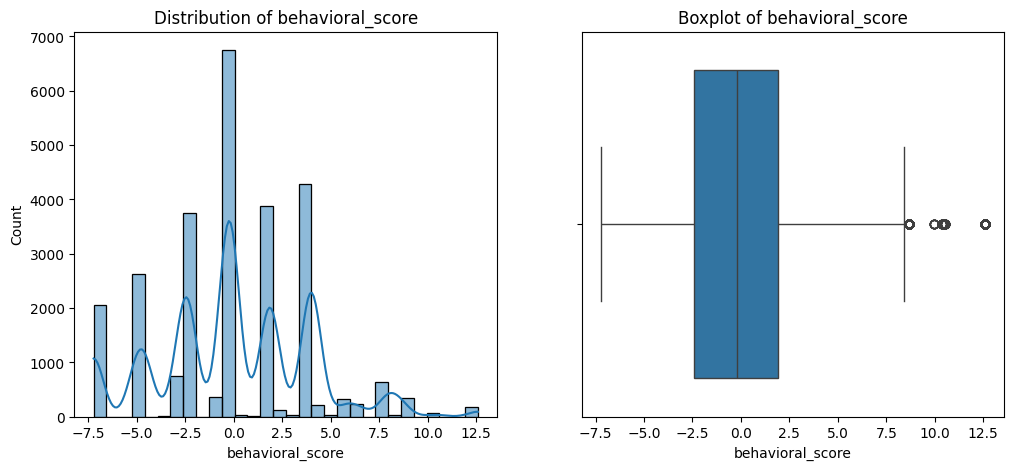

Skewness of behavioral_score: 0.18



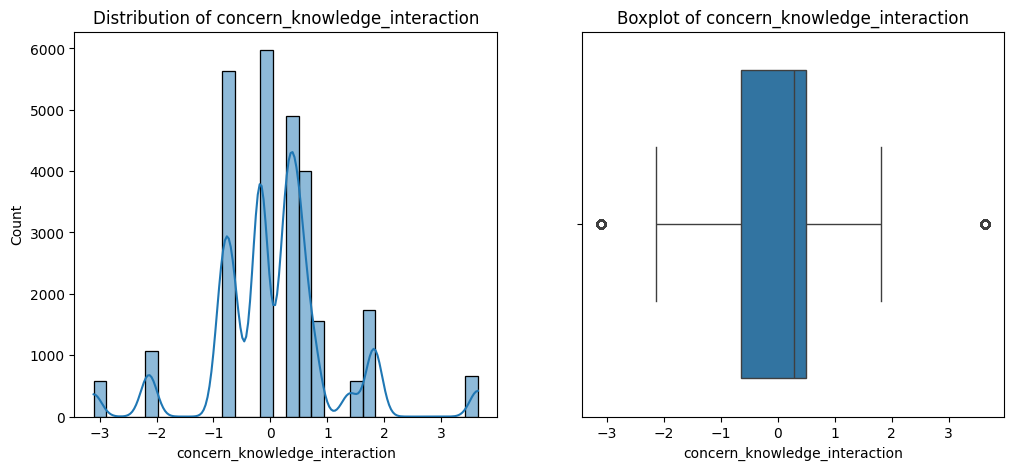

Skewness of concern_knowledge_interaction: 0.27



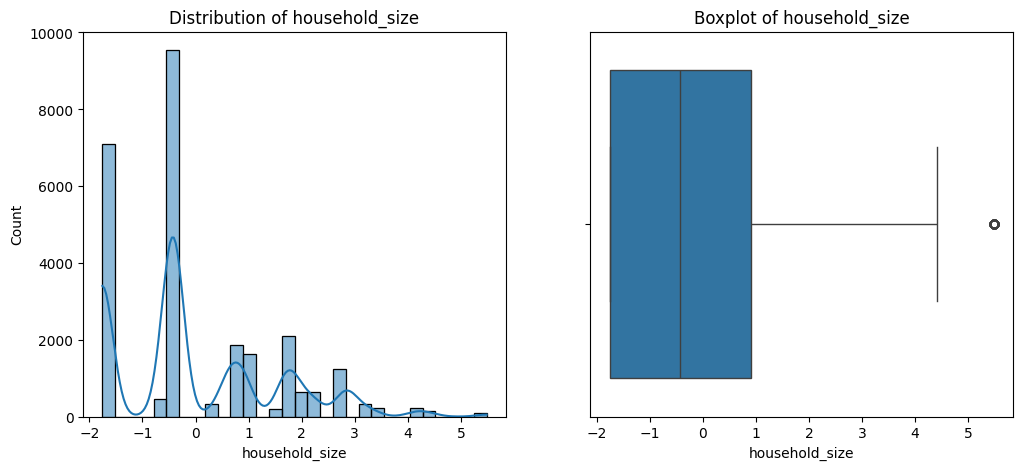

Skewness of household_size: 0.78



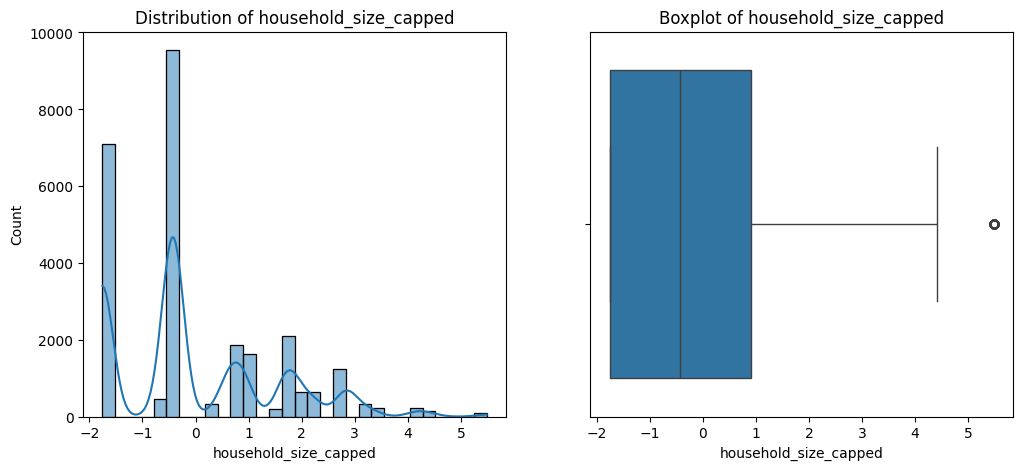

Skewness of household_size_capped: 0.78



In [34]:

cols_with_outliers = ['behavioral_score', 
                      'concern_knowledge_interaction', 
                      'household_size', 
                      'household_size_capped']

for col in cols_with_outliers:
    plt.figure(figsize=(12,5))

    # Histogram with KDE
    plt.subplot(1,2,1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")

    plt.show()

    # Print skewness
    skew = df[col].skew()
    print(f"Skewness of {col}: {skew:.2f}\n")


In [35]:
# Save the cleaned and feature engineered dataset to CSV
df.to_csv("processed_data.csv", index=False)

print("Dataset saved successfully as processed_data.csv")

Dataset saved successfully as processed_data.csv
